In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Fish.csv")

# Count the number of fishes in each species
fish_count = df['Species'].value_counts()

# Print the number of fishes in each species
print(fish_count)


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


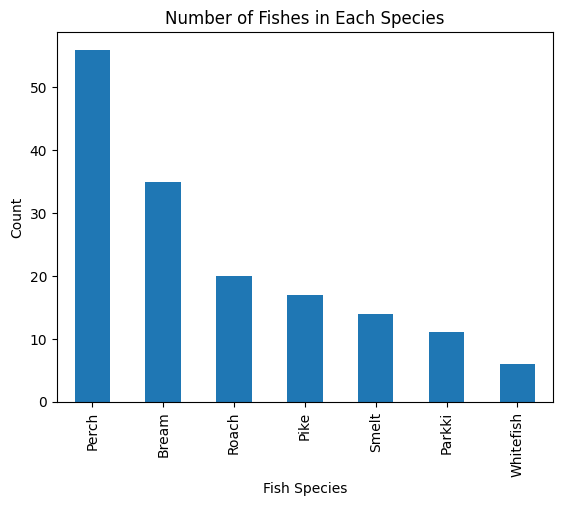

In [2]:
import matplotlib.pyplot as plt

# Plot the bar plot
fish_count.plot(kind='bar')

# Set the labels and title
plt.xlabel("Fish Species")
plt.ylabel("Count")
plt.title("Number of Fishes in Each Species")

# Show the plot
plt.show()


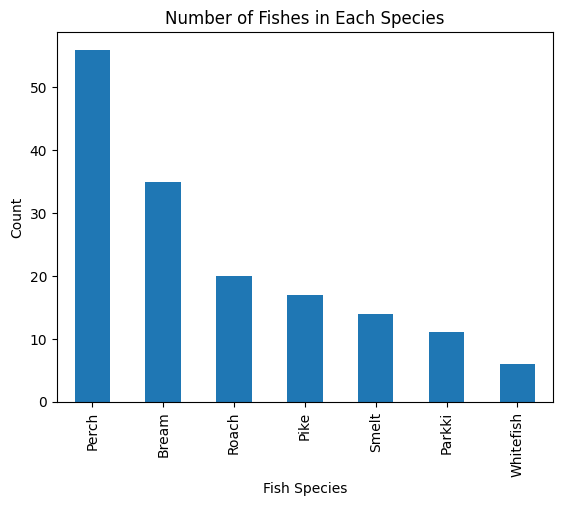

In [3]:
import matplotlib.pyplot as plt

# Plot the bar plot
fish_count.plot(kind='bar')

# Set the labels and title
plt.xlabel("Fish Species")
plt.ylabel("Count")
plt.title("Number of Fishes in Each Species")

# Show the plot
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X = df.drop(['Weight', 'Species'], axis=1)  # Features
y = df['Weight']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (119, 5) (119,)
Test set shape: (40, 5) (40,)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the weights for test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 15271.289203414188


# Problem 2

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<Figure size 800x600 with 0 Axes>

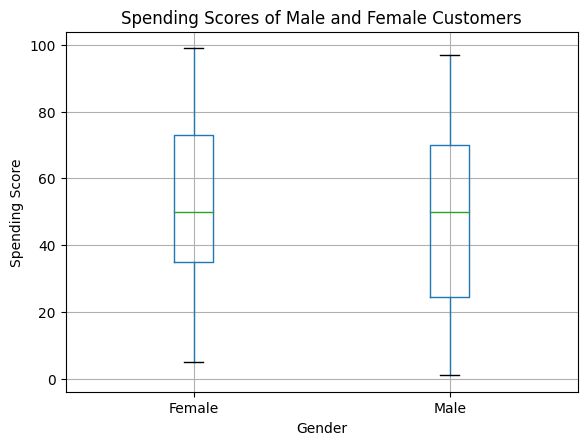

Highest Spending Score: 99
Average Spending Score: 50.2
Lowest Spending Score: 1


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Display the column names
print(df.head())

# Visualize male and female customers' spending scores using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='Spending Score (1-100)', by='Genre')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Spending Scores of Male and Female Customers')
plt.suptitle('')  # Remove the default title
plt.show()

# Find the highest, average, and lowest spending scores
highest_spending_score = df['Spending Score (1-100)'].max()
average_spending_score = df['Spending Score (1-100)'].mean()
lowest_spending_score = df['Spending Score (1-100)'].min()

print("Highest Spending Score:", highest_spending_score)
print("Average Spending Score:", average_spending_score)
print("Lowest Spending Score:", lowest_spending_score)


Number of entries with spending scores above average: 97
Number of entries with spending scores below average: 103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

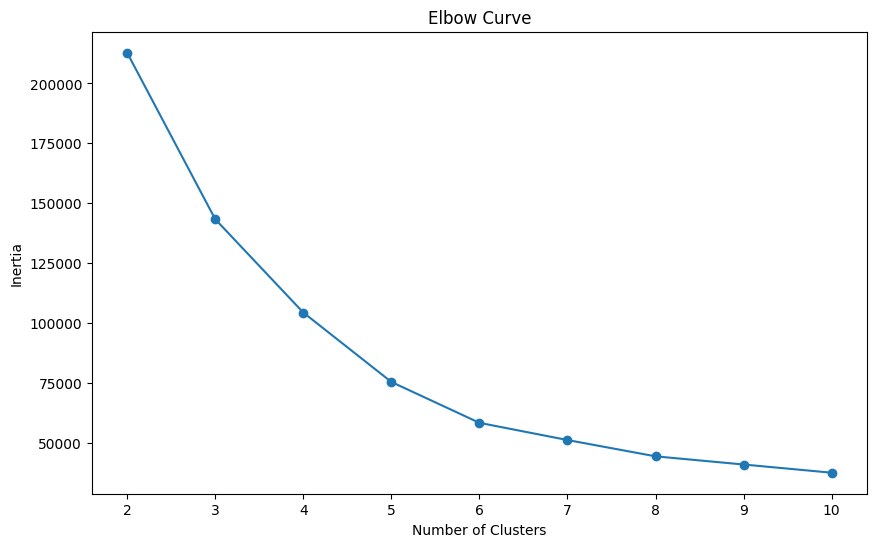

KeyboardInterrupt: ignored

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import numpy as np


# c) Find the number of entries when spending scores are above average and less than average
average_spending_score = df['Spending Score (1-100)'].mean()
above_average_entries = df[df['Spending Score (1-100)'] > average_spending_score].shape[0]
below_average_entries = df[df['Spending Score (1-100)'] < average_spending_score].shape[0]

print("Number of entries with spending scores above average:", above_average_entries)
print("Number of entries with spending scores below average:", below_average_entries)

# d) Replace the Gender field values as follows: 1 -> Female, 2 -> Male
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Genre'])
df['Gender'] = df['Gender'].map({1: 'Female', 2: 'Male'})

# e) Find the number of clusters using the elbow method
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
silhouette = []
max_clusters = 10

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# f) Identify similar groups of customers using k-means clustering
num_clusters = int(input("Enter the number of clusters based on the elbow curve: "))
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Group customers by cluster
grouped_customers = df.groupby('Cluster')

# Print the characteristics of each cluster
for cluster, group in grouped_customers:
    print("\nCluster:", cluster)
    print(group.describe())



# pblm 3

In [18]:
def reverse_number(num):
    reversed_num = 0

    while num > 0:
        # Get the last digit of the number
        digit = num % 10

        # Append the digit to the reversed number
        reversed_num = (reversed_num * 10) + digit

        # Remove the last digit from the number
        num = num // 10

    return reversed_num


# Prompt the user to enter a number
num = int(input("Enter a number: "))

# Call the function to reverse the number
reversed_number = reverse_number(num)

# Print the reversed number
print("Reversed number:", reversed_number)


Enter a number: 12345
Reversed number: 54321
